In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os

# Load sweep_summary.txt

In [5]:
# folder where all simulations are stored
sim_root = '/Users/wdeback/Simulation'
# folder where sweep results are stored (subfolder of sim_root)
sweep_folder = 'Toggle-Switch_sweep_59'
# read sweep_summary into dataframe
df = pd.read_csv(os.path.join(sim_root, sweep_folder, 'sweep_summary.txt'), sep='\t', skiprows=4)
# show first lines of dataframe
df.head()

# Folder   P0
0  Toggle-Switch_sweep_59/Toggle-Switch_6394  1.0
1  Toggle-Switch_sweep_59/Toggle-Switch_6395  1.2
2  Toggle-Switch_sweep_59/Toggle-Switch_6396  1.4
3  Toggle-Switch_sweep_59/Toggle-Switch_6397  1.6
4  Toggle-Switch_sweep_59/Toggle-Switch_6398  1.8

# Read data from logger.txt files

In [6]:
def get_data(folder):
    # filename
    fn = os.path.join(sim_root, folder, 'logger.txt')
    # get data into dataframe
    df_temp = pd.read_csv(fn, sep='\t')
    # get time at end of logtime
    maxtime = df_temp['time'].max() 
    # get x,y values of last time step
    df_temp = df_temp[df_temp['time'] == maxtime]
    # return x,y values as numpy array
    return df_temp[['u', 'v']].values[0]

results = []
# for each row in the dataframe
for i, row in df.iterrows():
    # get the folder
    folder = row['# Folder']
    # get parameter value
    parameter = row['P0']
    # get data from logger.txt (see above)
    data = get_data(folder)
    # add to results list
    results.append( [parameter, data[0], data[1]] )

# convert results list to pandas dataframe
df_results = pd.DataFrame(results, columns=['a1', 'u', 'v'])
# show first lines of dataframe
df_results.head()

a1         u        v
0  1.0  0.111832  1.99684
1  1.2  0.134505  1.99479
2  1.4  0.157484  1.99188
3  1.6  0.180896  1.98791
4  1.8  0.204037  1.98346

# Plot data

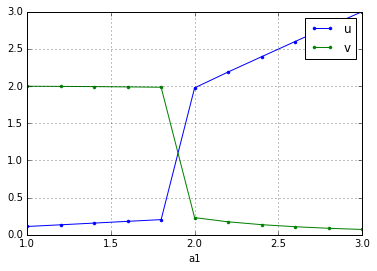

In [7]:
# plot x vs a1
plt.plot(df_results['a1'], df_results['u'], '.-', label='u')
# plot y vs a1
plt.plot(df_results['a1'], df_results['v'], '.-', label='v')
plt.xlabel('a1')
plt.grid()
plt.ylim(bottom=0)
plt.legend()